In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import pdb

## Squeeze

In [2]:
y = torch.zeros([2,2])
torch.squeeze(y)

tensor([[0., 0.],
        [0., 0.]])

In [3]:
torch.squeeze(y, 0)

tensor([[0., 0.],
        [0., 0.]])

In [4]:
torch.squeeze(y, 1)

tensor([[0., 0.],
        [0., 0.]])

## Unsqueeze

In [5]:
z = torch.tensor([1,3,6])

In [6]:
torch.unsqueeze(z, 0)

tensor([[1, 3, 6]])

In [7]:
torch.unsqueeze(z, 1)

tensor([[1],
        [3],
        [6]])

In [8]:
x = torch.arange(100, dtype=torch.float64).float().unsqueeze(1)

print(x)

tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.],
        [51.],
        [52.],
        [53.],
        [54.],
        [55.],
        [56.],
        [57.],
        [58.],
        [59.],
        [60.],
        [61.],
        [62.],
        [63.],
        [64.],
        [65.],
        [6

Episode 0, loss 16198.7246 
Episode 50, loss 9813.8643 
Episode 100, loss 5516.9468 
Episode 150, loss 2869.8298 
Episode 200, loss 1370.5582 
Episode 250, loss 597.1932 
Episode 300, loss 236.4828 
Episode 350, loss 85.0023 
Episode 400, loss 27.8259 
Episode 450, loss 8.4330 
Episode 500, loss 2.5196 
Episode 550, loss 0.8974 
Episode 600, loss 0.4961 
Episode 650, loss 0.4052 
Episode 700, loss 0.3850 
Episode 750, loss 0.3790 
Episode 800, loss 0.3755 
Episode 850, loss 0.3723 
Episode 900, loss 0.3690 
Episode 950, loss 0.3656 


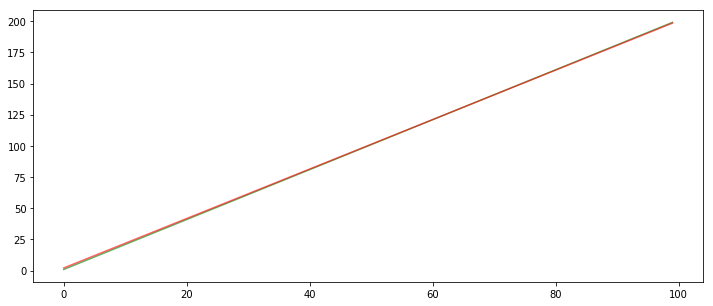

In [10]:
b = 1
x = torch.arange(0, 100, out=torch.FloatTensor()).unsqueeze(1)

y = 2 * x + b

### PARAMS ###
learning_rate = 0.01
num_episodes = 1000

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer = nn.Linear(1,1)
        
    def forward(self, x):
        output = self.layer(x)
        return output
    
mynn = NeuralNetwork()
loss_function = nn.MSELoss()
optimizer = optim.Adam(mynn.parameters(), lr=learning_rate)

for i_episode in range(num_episodes):
    predicted_value = mynn(x)
    loss = loss_function(predicted_value, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i_episode % 50 == 0:
        print("Episode %i, loss %.4f " % (i_episode, loss))
        
plt.figure(figsize=(12,5))
plt.plot(x.data.numpy(), y.data.numpy(), alpha=0.6, color="green")
plt.plot(x.data.numpy(), predicted_value.data.numpy(), alpha=0.6, color="red")
plt.show()